In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
# The csv is generating using `cargo run --release > timings.csv
arr = np.loadtxt("../timings.csv", delimiter=",", dtype=int)

In [12]:
n = arr.transpose()[0]
n = n.reshape((-1, 1))
n = np.log2(n)
n

array([[19.53563989],
       [19.17035543],
       [18.4169954 ],
       [15.87267488],
       [19.55449892],
       [19.5731146 ],
       [16.28771238],
       [16.60964047],
       [19.19460298],
       [19.39623684],
       [19.45763738],
       [19.4169954 ],
       [19.31008019],
       [19.84230123],
       [19.28771238],
       [17.9881521 ],
       [19.90242222],
       [19.31008019],
       [14.28771238],
       [19.76344581],
       [18.9881521 ],
       [18.04259988],
       [19.77956548],
       [16.28771238],
       [19.93156857],
       [17.93156857],
       [16.28771238],
       [16.747144  ],
       [19.55449892],
       [19.19460298],
       [19.01563283],
       [15.28771238],
       [19.917069  ],
       [19.17035543],
       [19.4169954 ],
       [13.28771238],
       [19.06907209],
       [19.0950673 ],
       [16.60964047],
       [17.53563989],
       [18.64526438],
       [17.93156857],
       [15.60964047],
       [19.71397713],
       [19.85756799],
       [16

In [13]:
y = arr.transpose()[1]
y = np.log2(y)

In [14]:
regr = LinearRegression().fit(n, y)
regr.score(n, y)

0.9999059071867903

model.summary()

In [15]:
regr.coef_

array([1.38345812])

In [16]:
regr.intercept_

-6.12166147775423

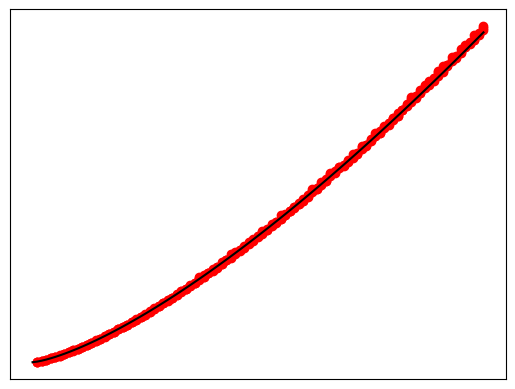

In [17]:
n_orig = arr.transpose()[0].reshape((-1, 1))
y_orig = arr.transpose()[1]
# Plot outputs
plt.scatter(n_orig, y_orig, color="red")
# plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

x = np.linspace(100, 1000000, 100)
y_pred = (2**regr.intercept_) * np.power(x, regr.coef_)



plt.plot(x, y_pred, color="black")

plt.show()